<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/aulas-ml-andrew-nig-coursera/blob/main/gradiente_descendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Iteração 0: Custo = 152423699592.24
Iteração 100: Custo = 20648732992.71
Iteração 200: Custo = 2958519690.19
Iteração 300: Custo = 583544499.26
Iteração 400: Custo = 264675892.02
Iteração 500: Custo = 221861283.02
Iteração 600: Custo = 216112173.22
Iteração 700: Custo = 215340135.48
Iteração 800: Custo = 215236452.69
Iteração 900: Custo = 215222527.35

Valores finais de θ:
θ0: 526191.60
θ1: 184002.88
θ2: 11683.00


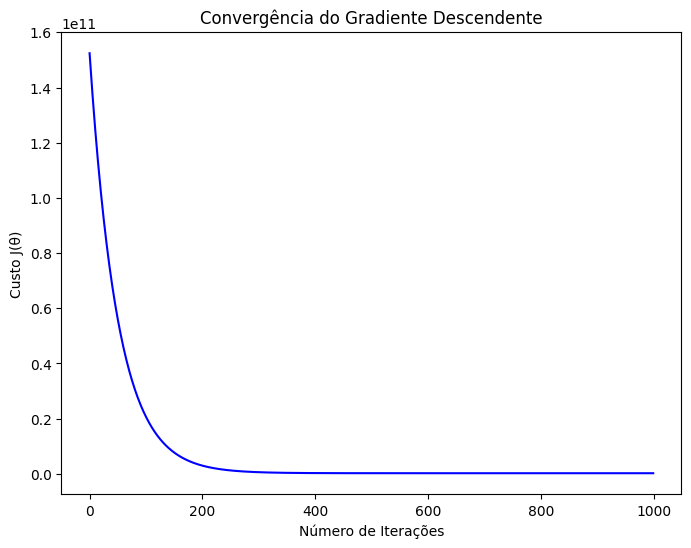

In [2]:

# Criando um dataset fictício de preços de casas
np.random.seed(42)
tamanho_m2 = np.random.randint(50, 250, 100)  # Tamanho da casa em m²
num_quartos = np.random.randint(1, 6, 100)  # Número de quartos
preco = 50000 + 3000 * tamanho_m2 + 10000 * num_quartos + np.random.normal(0, 20000, 100)  # Preço em reais

# Criando um DataFrame
df = pd.DataFrame({'Tamanho_m2': tamanho_m2, 'Num_Quartos': num_quartos, 'Preco': preco})

# Preparando os dados
X = df[['Tamanho_m2', 'Num_Quartos']]
y = df['Preco'].values.reshape(-1, 1)

# Normalizando as features
X = (X - X.mean()) / X.std()

# Adicionando a coluna de bias (termo θ0)
X.insert(0, 'Bias', 1)

# Convertendo para numpy arrays
X = X.values
m, n = X.shape  # m = número de exemplos, n = número de features (+1 bias)

# Inicializando os parâmetros θ
theta = np.zeros((n, 1))

# Função de custo J(θ)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

# Gradiente Descendente
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= alpha * gradient  # Atualizando θ
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteração {i}: Custo = {cost:.2f}")

    return theta, cost_history

# Hiperparâmetros do gradiente descendente
alpha = 0.01  # Taxa de aprendizado
num_iters = 1000  # Número de iterações

# Aplicando o gradiente descendente
theta_final, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Exibindo os valores finais dos coeficientes
print("\nValores finais de θ:")
for i, coef in enumerate(theta_final.flatten()):
    print(f"θ{i}: {coef:.2f}")

# Plotando a convergência do custo
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Número de Iterações")
plt.ylabel("Custo J(θ)")
plt.title("Convergência do Gradiente Descendente")
plt.show()

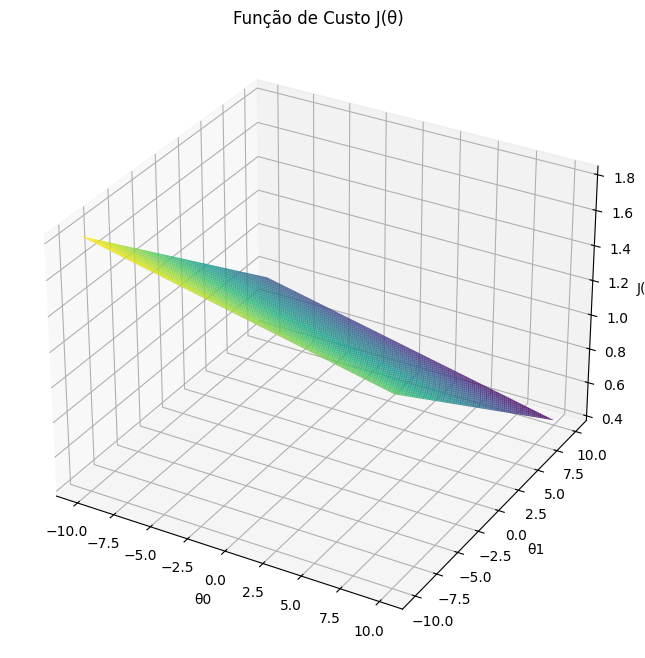

In [4]:



#Gerando o gráfico da função de custo em 3D (para theta0 e theta1)
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X[:,:2], y, t.reshape(-1,1))

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J(θ)')
ax.set_title('Função de Custo J(θ)')
plt.show()